# Question 2

## Task 8.1

For easier process of writing rates of change, lets write out all the processes and rates

Processes:
1) E + S -> ES
2) ES -> E + S
3) ES -> E + P

Rates: 
1) k1[E][S]
2) k2[ES]
3) k3[ES]

Rates of change of the 4 species - E, S, P and ES: # task 8.1 - rate changes of changes of four species 
1) [E] = -k1[E][S] + k2[ES] - k3[ES]
2) [S] = -k1[E][S] + k2[ES]
3) [P] = k3[ES]
4) [ES] = k1[E][S] - k2[ES] - k3[ES]


parameters: k1, k2, k2


## Task 8.2

In [71]:
import matplotlib.pyplot as plt
import ipympl

import numpy as np
from scipy.integrate import odeint

In [72]:
# simulation which solve the equations given conditions 

def simulation(s,t):
    # unpacking the values 
    E, S, ES, P = s
    
    # defining rate constans
    k1 = 100
    k2 = 600
    k3 = 150
    
    # calculate system rates
    dS = -(k1*E*S)+(k2*ES)
    dE = -(k1*E*S)+(k2*ES)+(k3*ES)
    dES = (k1*E*S)-(k2*ES)-(k3*ES)
    dP = (k3*ES)
    
    # return rates
    ds = [dE, dS, dES, dP]

    return ds

In [73]:
# initial conditions
E0 = 1
S0 = 10 
ES0 = 0
P0 = 0 

# packing the initial conditions into a list
s0 = [E0, S0, ES0, P0]

# simulation(s0) # if we exclude t fromm the simulation 

In [65]:
# lets run the simulation over a period of time and produce a plot of concentration vs time 
# to study the rate of changes of the 4 species

# defiining time period and the number of time observations
t_max = 0.5
num_obs = 1001
t_obs = np.linspace(0, t_max, num_obs)

# simulating a model using the simulation functiono, initial coonditionas and time points
s_obs = odeint(simulation, s0, t_obs)

# unpacking obtained results
E_obs = s_obs[:,0]
S_obs = s_obs[:,1]
ES_obs = s_obs[:,2]
P_obs = s_obs[:,3]

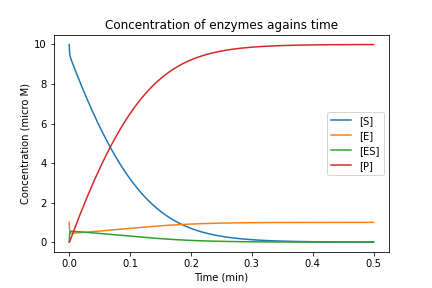

In [66]:
# plotiing the figure
fig1 = plt.figure()
ax = plt.subplot(1,1,1)
ax.plot(t_obs,S_obs, '-', label='[S]')
ax.plot(t_obs,E_obs, '-', label='[E]')
ax.plot(t_obs,ES_obs, '-', label='[ES]')
ax.plot(t_obs,P_obs, '-', label='[P]')

ax.set_title("Concentration of enzymes agains time")
ax.set_xlabel('Time (min)')
ax.set_ylabel('Concentration (micro M)')
ax.legend()


# Task 8.3

In [67]:
# building a different simulation for the 
def MM_simulation(s,t):
    
    # unpaccking values
    S = s[0]
    P = s[1]
    
    # rate constans
    k1 = 0.1
    km1 = 0.01
    k2 = 0.2
    
    # Vmax and Km equations
    Vmax = k2/E0
    Km = (km1 + k2)/k1

    rate_S_to_P = Vmax*S/(Km + S) # also V - velocity (Michaelis-Menten equation)

    dS = -rate_S_to_P # substrate usage - velocity goes down as the concentration of substrate in the system and reaches its minimum
    dP =  rate_S_to_P # product formation - velocity increases until the level of substrate in the system becomes so low that new prroduct cannot be formed

    ds = [dS, dP]
    
    return ds


In [68]:
# initial conditions
E0 = 1
S0 = 10 
ES0 = 0
P0 = 0 

# definiing initial values
s0_MM = [S0, P0]

# defiining time period and the number of time observations
t_max = 100
num_obs = 1001
t_obs = np.linspace(0, t_max, num_obs)

# simulating the model
s_obs2 = odeint(MM_simulation, s0_MM, t_obs)

# unpacking the obtained values
S_obs2 = s_obs2[:,0]
P_obs2 = s_obs2[:,1]

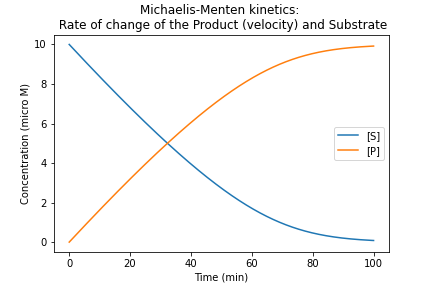

In [69]:
# Plotting the results
fig1 = plt.figure()
ax = plt.subplot(1,1,1)
ax.plot(t_obs,S_obs2, '-', label='[S]')
ax.plot(t_obs,P_obs2, '-', label='[P]')

ax.set_title("Michaelis-Menten kinetics: \n Rate of change of the Product (velocity) and Substrate")
ax.set_xlabel('Time (min)')
ax.set_ylabel('Concentration (micro M)')
ax.legend()

In [70]:
# obtaining V max for S
print("Vmax", float(S_obs2[1]/t_obs[1]))

Vmax 99.83473448712769
